# Algorithm: K-Means
## Dataset: Bank Transactions

## Step-01 Load Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## Step-02 Load Dataset

In [20]:

df = pd.read_csv('bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [21]:
df.dropna(inplace=True)

## Step-03 Data Preprocessing

In [22]:
df.shape

(19889, 9)

In [23]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [24]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [25]:
numeric_features = df[['CustAccountBalance','TransactionAmount (INR)']]
numeric_features.head()

,CustAccountBalance,TransactionAmount (INR)
0,17819.05,25.0
1,2270.69,27999.0
2,17874.44,459.0
3,866503.21,2060.0
4,6714.43,1762.5


In [26]:
numeric_features.dropna(inplace=True)

In [27]:
numeric_features.shape

(19889, 2)

## Step-04 Scale the Data

In [28]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_features)

## Step-05 Apply K-Means Algorithm for various k values

*  value will be less when it will be in the right cluster
*  value will be high when it will be in the wrong cluster
  
* Range of the Silhouette Score is between -1 and 1

In [29]:
inertia_values = []
silhouette_scores = []

k_range = range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k , random_state=42)
    kmeans.fit(data_scaled)

    inertia_values.append(kmeans.inertia_)
    silhouette = silhouette_score(data_scaled , kmeans.labels_)

    silhouette_scores.append(silhouette)



## Step-06 Elbow Method

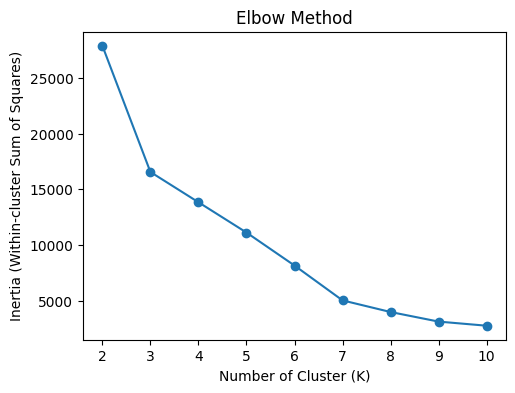

In [53]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(k_range,inertia_values,marker = 'o' , linestyle = '-')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

**Insights:**

- Best value of k is 3 according to graph 

## Step-07 Silhouette Score

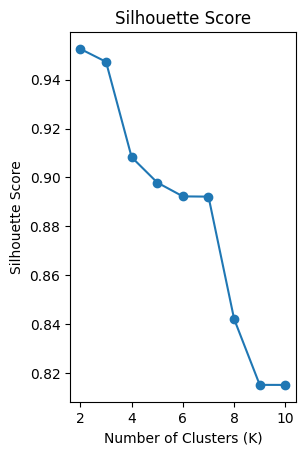

In [51]:
plt.subplot(1,2,2)
plt.plot(k_range, silhouette_scores , marker = 'o', linestyle = '-' )
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Score")
plt.show()

**Insights:**

- Optimal value of k lies between 2 and 3, according graph.
- what will be value of silhouette score?

## Step-08 Perform K-Means Clustering

In [62]:
kmeans = KMeans(n_clusters=3 , random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Cluster
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0,0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0,0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0,0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0,0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5,0


In [35]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'Cluster'],
      dtype='object')

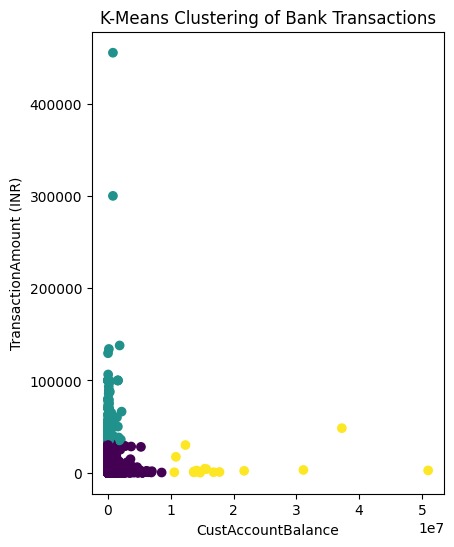

In [60]:
# Based on the Elbow Method and Silhouette Score, we can choose K = 3
# Visualize and Interpret the clusters

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(df['CustAccountBalance'],df['TransactionAmount (INR)'] , c = df['Cluster'] , cmap='viridis')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('K-Means Clustering of Bank Transactions')
plt.show()